In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('Test/test.csv')

In [3]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [5]:
X= df.drop(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus','PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans','WklyStudyHours', 'WritingScore' , 'ReadingScore'], axis=1)

In [6]:
print (X)

       MathScore
0             71
1             69
2             87
3             45
4             76
...          ...
30636         59
30637         58
30638         61
30639         82
30640         64

[30641 rows x 1 columns]


In [7]:
y1 = df['ReadingScore']
y2 = df['WritingScore']

In [8]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, shuffle=True, random_state=0)

In [9]:
model1 = LinearRegression()
model1.fit(X_train, y1_train)

LinearRegression()

In [10]:
y1_pred = model1.predict(X_test)
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print('Mean Squared Error (ReadingScore):', mse1)
print('R2 (ReadingScore):', r2_1)

Mean Squared Error (ReadingScore): 71.62337468294214
R2 (ReadingScore): 0.6687635030478718


In [11]:
model2 = LinearRegression()
model2.fit(X_train, y2_train)

LinearRegression()

In [12]:
y2_pred = model2.predict(X_test)
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print('Mean Squared Error (WritingScore):', mse2)
print('R2 (WritingScore):', r2_2)

Mean Squared Error (WritingScore): 82.93697750012446
R2 (WritingScore): 0.648624006535524


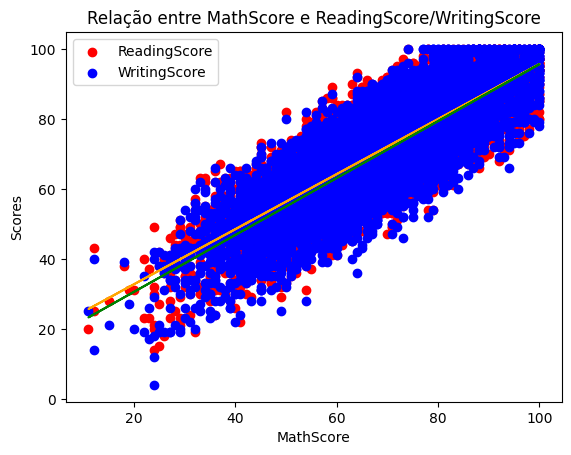

In [13]:
plt.scatter(X_test, y1_test, color='red', label='ReadingScore')
plt.scatter(X_test, y2_test, color='blue', label='WritingScore')
plt.plot(X_test, y1_pred, color='orange')
plt.plot(X_test, y2_pred, color='green')
plt.xlabel('MathScore')
plt.ylabel('Scores')
plt.title('Relação entre MathScore e ReadingScore/WritingScore')
plt.legend()
plt.show()

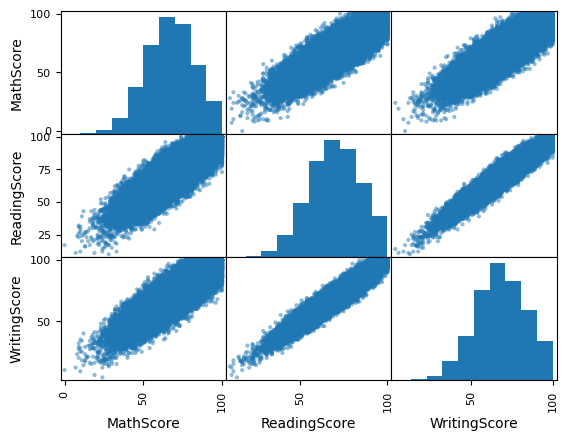

In [14]:
scatter_matrix(df[['MathScore', 'ReadingScore', 'WritingScore']])
plt.show()

In [15]:
X= df.drop(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore'], axis=1)
X

,ReadingScore,WritingScore
0,71,74
1,90,88
2,93,91
3,56,42
4,78,75
...,...,...
30636,61,65
30637,53,51
30638,70,67
30639,90,93


In [16]:
Y = df['MathScore']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=0)

In [18]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
Y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 76.23894671393022
R2 Score: 0.6766012836475322


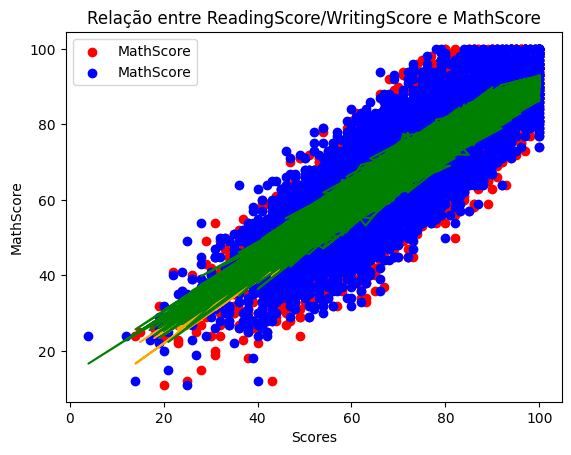

In [21]:
plt.scatter(X_test['ReadingScore'], Y_test, color='red', label='MathScore')
plt.scatter(X_test['WritingScore'], Y_test, color='blue', label='MathScore')
plt.plot(X_test['ReadingScore'], Y_pred, color='orange')
plt.plot(X_test['WritingScore'], Y_pred, color='green')
plt.xlabel('Scores')
plt.ylabel('MathScore')
plt.title('Relação entre ReadingScore/WritingScore e MathScore')
plt.legend()
plt.show()


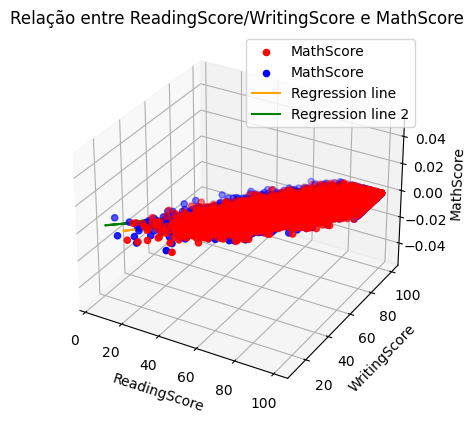

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['ReadingScore'], Y_test, color='red', label='MathScore')
ax.scatter(X_test['WritingScore'], Y_test, color='blue', label='MathScore')
ax.plot(X_test['ReadingScore'], Y_pred, color='orange', label='Regression line')
ax.plot(X_test['WritingScore'], Y_pred, color='green', label='Regression line 2')
ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('MathScore')
plt.title('Relação entre ReadingScore/WritingScore e MathScore')
plt.legend()
plt.show()

In [23]:
X= df.drop(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'WritingScore'], axis=1)
X

,ReadingScore
0,71
1,90
2,93
3,56
4,78
...,...
30636,61
30637,53
30638,70
30639,90


In [24]:
y = df['WritingScore']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2:', r2)

Mean Squared Error: 22.329842681238866
R2: 0.9053959899127746


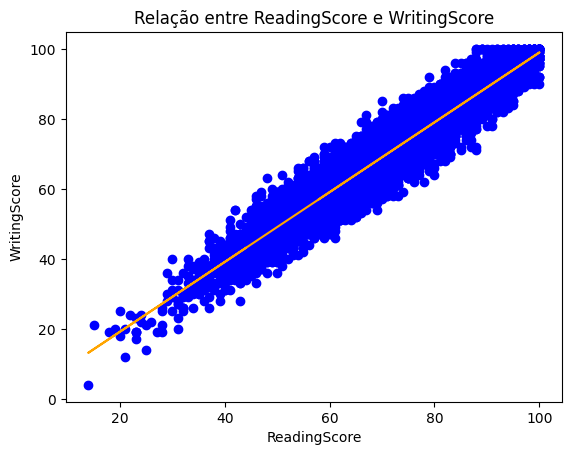

In [30]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='orange')
plt.xlabel('ReadingScore')
plt.ylabel('WritingScore')
plt.title('Relação entre ReadingScore e WritingScore')
plt.show()